#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

#### Reading the Data

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape # Shape of the dataset

(200, 5)

In [4]:
df.info()  # Dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()  # Statistical description of the dataset

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df['CustomerID'].nunique()  # No of unique Customer ID's

200

In [7]:
df['Gender'].value_counts() 

Gender
Female    112
Male       88
Name: count, dtype: int64

In [8]:
df.isnull().sum()/100  # Finding the missing values in the dataset

CustomerID                0.0
Gender                    0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64

In [9]:
# Categorizing age 

def age_category(age):
    """
    Categorizing the age using the age column
    
    Returns:
    None
    """
    if age <= 40:
        return "Young"
    elif age <= 50:
        return "Middle_Aged"
    else:
        return "Old"

In [10]:
def agewise_category(df):
    """
    Splitting the age

    Returns:
    None
    """
    df["AGE_GROUP"] = df["Age"].apply(age_category)
    return df.head()

In [11]:
agewise_category(df)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),AGE_GROUP
0,1,Male,19,15,39,Young
1,2,Male,21,15,81,Young
2,3,Female,20,16,6,Young
3,4,Female,23,16,77,Young
4,5,Female,31,17,40,Young


In [12]:
df['AGE_GROUP'].value_counts()

AGE_GROUP
Young          122
Old             40
Middle_Aged     38
Name: count, dtype: int64

In [13]:
# Moving the column position of AGE_GROUP

column_to_move = df.pop("AGE_GROUP")

df.insert(3, "AGE_GROUP", column_to_move)

In [14]:
category_order = ['Young', 'Middle_Aged', 'Old']
df['AGE_GROUP'] = pd.Categorical(df['AGE_GROUP'], categories=category_order, ordered=True)

In [15]:
df.head()

,CustomerID,Gender,Age,AGE_GROUP,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,Young,15,39
1,2,Male,21,Young,15,81
2,3,Female,20,Young,16,6
3,4,Female,23,Young,16,77
4,5,Female,31,Young,17,40


In [16]:
# Categorizing spendings 

def spending(score):
    """
    Categorizing the spendings using the Spending Score column
    
    Returns:
    None
    """
    if score <= 50:
        return "Category 1"
    elif score <= 75:
        return "Category 2"
    else:
        return "Category 3"

In [17]:
def spending_category(df):
    """
    Splitting the spending score

    Returns:
    None
    """
    df["Spending Category"] = df["Spending Score (1-100)"].apply(spending)
    return df.head()

In [18]:
spending_category(df)

,CustomerID,Gender,Age,AGE_GROUP,Annual Income (k$),Spending Score (1-100),Spending Category
0,1,Male,19,Young,15,39,Category 1
1,2,Male,21,Young,15,81,Category 3
2,3,Female,20,Young,16,6,Category 1
3,4,Female,23,Young,16,77,Category 3
4,5,Female,31,Young,17,40,Category 1


In [19]:
# Bar plot to display the Gender difference

def gender_diff(df):
    """
    Plotting a bar chart to visualize gender distribution in the DataFrame.

    Parameters:
    df (DataFrame): The DataFrame containing a 'GENDER' column.

    Returns:
    None

    This function creates a bar plot displaying the counts of different gender categories 
    within the 'GENDER' column of the DataFrame. It uses the 'Set2' color palette to enhance 
    visual appeal and sets appropriate labels for clarity.
    """
    gender_counts = df['Gender'].value_counts()
    fig, ax = plt.subplots(figsize=(5, 5))
    sns.barplot(x=df['Gender'].value_counts().keys(), 
                y=df['Gender'].value_counts(), 
                palette='Set2', 
                ax=ax, 
                width=0.5)
    ax.set_title("GENDER DIFFERENCE")
    ax.set_ylabel('COUNT')

    # Adding values on top of the bars
    for x, y in zip(range(len(gender_counts)), gender_counts):
        ax.text(x, y, str(y), ha='center')
    
    plt.tight_layout()
    plt.show()

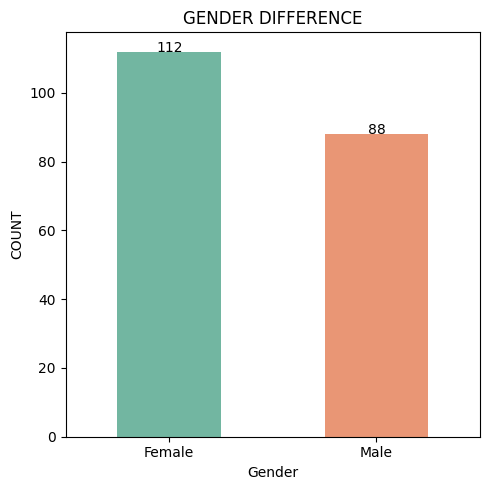

In [20]:
gender_diff(df)

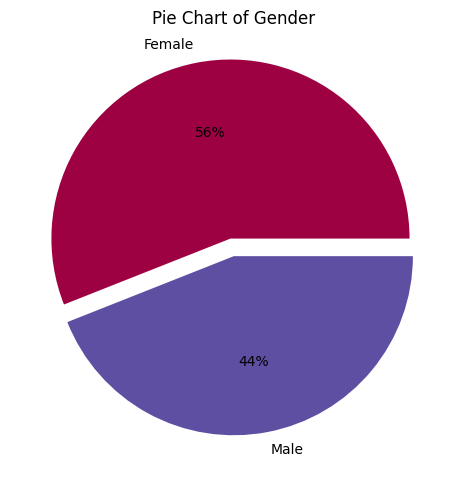

In [21]:
def pie_chart(df):
    """
    Plots a pie chart for the given column in the DataFrame.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    column (str): The column for which to plot the pie chart.
    title (str): The title of the pie chart.

    Returns:
    None
    """
    fig, ax = plt.subplots(figsize=(8, 5))
    df['Gender'].value_counts().plot(kind='pie', autopct='%1.0f%%', ax=ax, explode = [0.1, 0], cmap = 'Spectral')
    ax.set_title('Pie Chart of Gender')
    ax.set_ylabel('')
    plt.tight_layout()
    plt.show()

pie_chart(df)

In [22]:
# Bar plot to display the Gender difference

def age_diff(df):
    """
    Plotting a bar chart to visualize gender distribution in the DataFrame.

    Parameters:
    df (DataFrame): The DataFrame containing a 'GENDER' column.

    Returns:
    None

    This function creates a bar plot displaying the counts of different gender categories 
    within the 'GENDER' column of the DataFrame. It uses the 'Set2' color palette to enhance 
    visual appeal and sets appropriate labels for clarity.
    """
    age_group_counts = df['AGE_GROUP'].value_counts()
    plt.figure(figsize=(5, 5))
    sns.barplot(x=df['AGE_GROUP'].value_counts().keys(), 
                y=df['AGE_GROUP'].value_counts(), 
                palette='Set2', 
                width=0.5)
    plt.title("AGE DIFFERENCE", fontweight = 'bold')
    plt.xticks(fontweight = 'bold')
    plt.yticks(fontweight = 'bold')
    plt.xlabel('AGE_GROUP', fontweight = 'bold')
    plt.ylabel('COUNT', fontweight = 'bold')
    plt.tight_layout()
    plt.show()

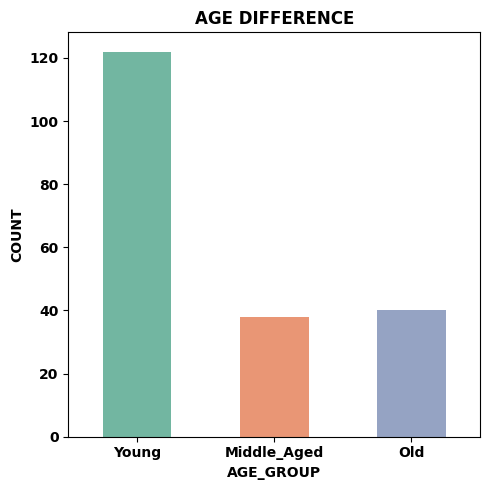

In [23]:
age_diff(df)

In [39]:
df_num = df.select_dtypes(exclude = object)  # Numerical columns extraction

In [40]:
df_num = df_num.drop(['CustomerID', 'AGE_GROUP'], axis=1)

In [43]:
def histogram_plot(df, columns):
    """
    Plotting histograms with KDE for specific columns in a DataFrame.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    columns (list): List of column names to plot.
    bins (int): Number of bins for the histogram (default is 10).

    Returns:
    None
    """
    for i in columns:
        plt.figure(figsize = (6, 5))
        plt.hist(df[i], bins = 10, color = 'skyblue', alpha = 0.5, edgecolor = 'black', density = True, label = 'Histogram')
        sns.kdeplot(df[i], color='red', linewidth = 2)
        plt.title(f'Histogram of {i}', fontweight = 'bold')
        plt.xlabel(i, fontweight = 'bold')
        plt.ylabel('Density', fontweight = 'bold')
        plt.tight_layout()
        plt.show()

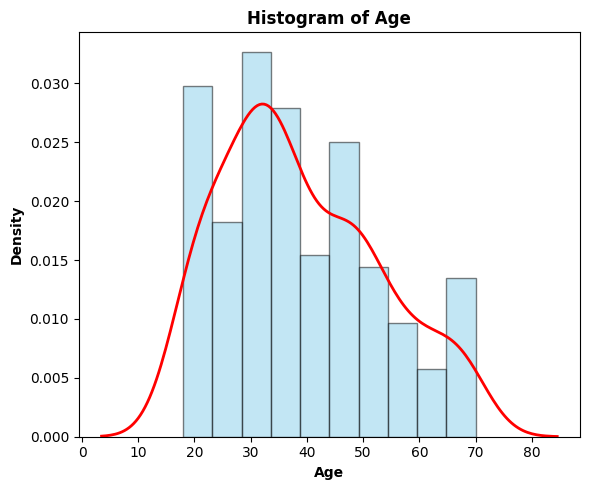

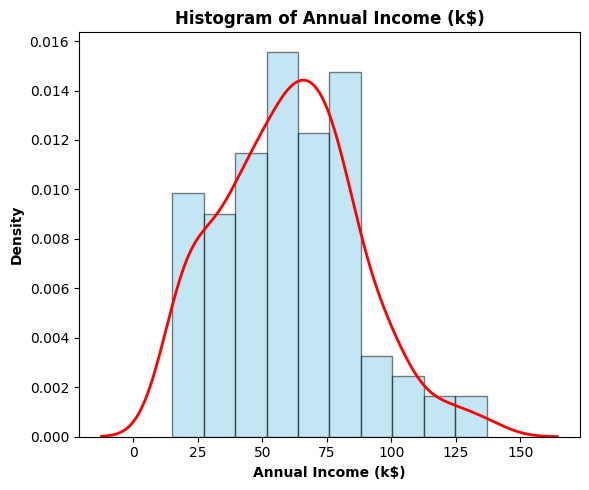

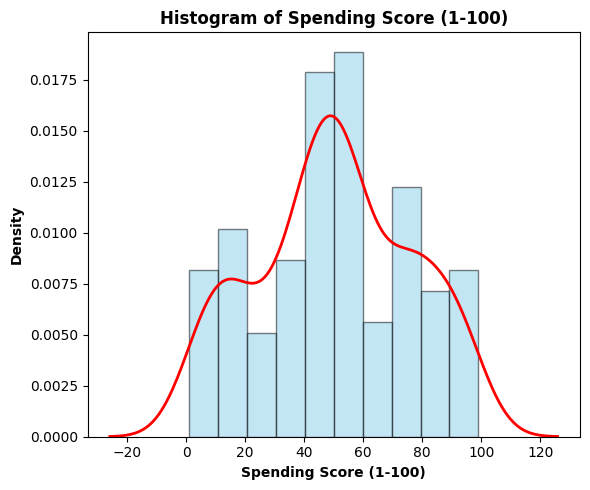

In [44]:
histogram_plot(df, df_num.columns)

In [45]:
def correlation_heatmap(df):
    """
    Plotting a heatmap to show the correlation matrix of the DataFrame.

    Parameters:
    figsize : The size of the figure (10, 6).
    cmap : The colormap to use for the heatmap.
    annot_size : Font size of the annotations.
    title : The title of the heatmap.

    Returns:
    Plot
    """
    plt.figure(figsize=(10, 6))
    sns.heatmap(df_num.corr(), annot=True, cmap='Blues', annot_kws={"size": 15, "fontweight" : 'bold'}, linewidths=0.5) 
    plt.xticks(fontsize=12, fontweight='bold', rotation=90, ha='right')  
    plt.yticks(fontsize=12, fontweight='bold', rotation=0) 
    plt.title('Correlation Heatmap', fontsize=18, fontweight='bold') 
    plt.tight_layout() 
    plt.show()


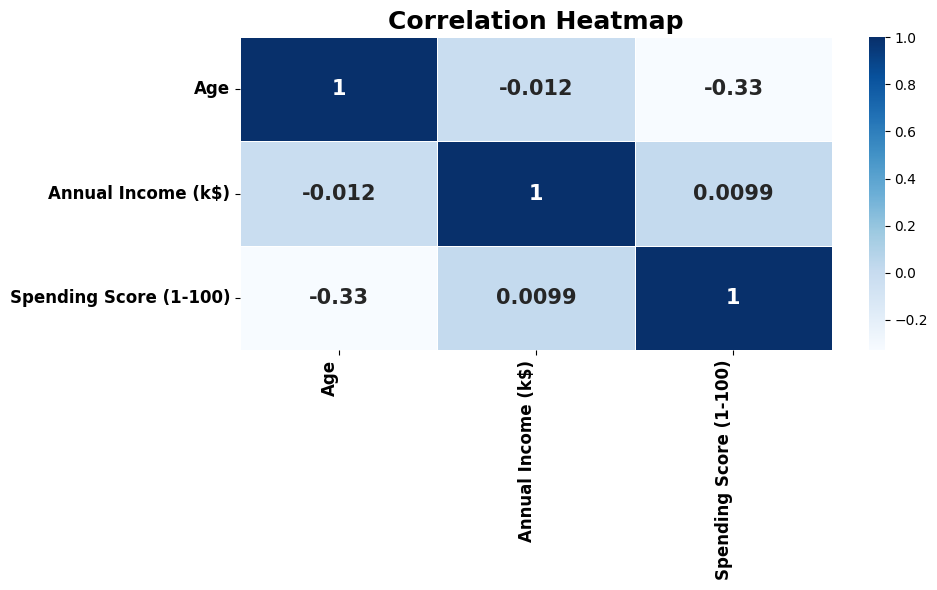

In [46]:
correlation_heatmap(df)  # Displaying the correlation heatmap

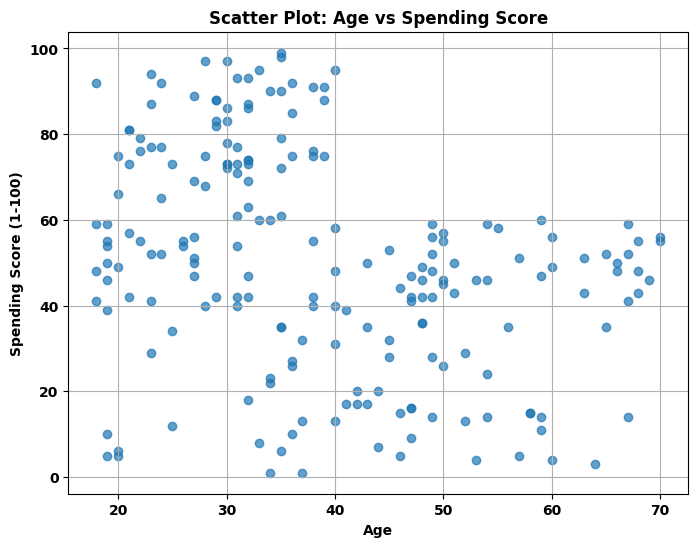

In [48]:
def scatter_plot(df):
    """
    Creates a scatter plot for two columns in the DataFrame.

    Parameters:
    df (DataFrame): The DataFrame containing the data.

    Returns:
    None
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(df['Age'], df['Spending Score (1-100)'], alpha=0.7)
    plt.title('Scatter Plot: Age vs Spending Score', fontweight = 'bold')
    plt.xticks(fontweight = 'bold')
    plt.yticks(fontweight = 'bold')
    plt.xlabel('Age', fontweight = 'bold')
    plt.ylabel('Spending Score (1-100)', fontweight = 'bold')
    plt.grid(True)
    plt.show()

scatter_plot(df)


In [49]:
df = df.drop(['CustomerID'],axis=1)

In [50]:
# Encoding the category values in the dataset for Clustering process
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['AGE_GROUP'] = le.fit_transform(df['AGE_GROUP'])
df['Spending Category'] = le.fit_transform(df['Spending Category'])

In [51]:
df.head()

,Gender,Age,AGE_GROUP,Annual Income (k$),Spending Score (1-100),Spending Category
0,1,19,2,15,39,0
1,1,21,2,15,81,2
2,0,20,2,16,6,0
3,0,23,2,16,77,2
4,0,31,2,17,40,0


In [52]:
# Using KMeans for the clustering
clust_mod = KMeans(n_clusters = 2, max_iter=1000, random_state=0)
clust_mod.fit(df)
label = pd.DataFrame(clust_mod.labels_, columns=['Clusters'])

In [53]:
label['Clusters'].value_counts()

Clusters
0    115
1     85
Name: count, dtype: int64

In [54]:
df['lables'] = clust_mod.labels_  # Displaying the cluster labels

In [55]:
df.head()

,Gender,Age,AGE_GROUP,Annual Income (k$),Spending Score (1-100),Spending Category,lables
0,1,19,2,15,39,0,0
1,1,21,2,15,81,2,1
2,0,20,2,16,6,0,0
3,0,23,2,16,77,2,1
4,0,31,2,17,40,0,0


The Silhouette_score for Cluster 2 is : 0.29
The Silhouette_score for Cluster 3 is : 0.38
The Silhouette_score for Cluster 4 is : 0.39
The Silhouette_score for Cluster 5 is : 0.38
The Silhouette_score for Cluster 6 is : 0.45
The Silhouette_score for Cluster 7 is : 0.44
The Silhouette_score for Cluster 8 is : 0.43


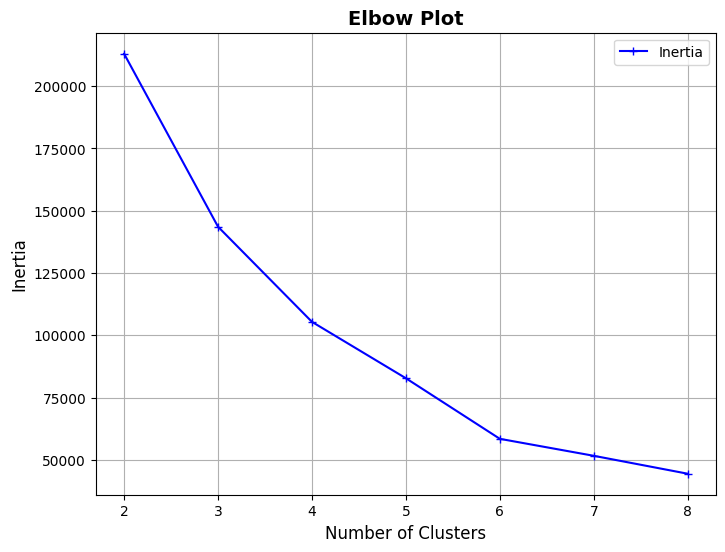

In [58]:
def cluster_grps(df):
    """
    Calculates and prints the silhouette scores and plots the inertia for different numbers of clusters.

    Parameters:
    df (DataFrame): The dataset to cluster.
    
    Returns:
    None
    """
    clusters = [2, 3, 4, 5, 6, 7, 8]
    inertia = []  # List to store inertia values
    
    for i in clusters:
        clust_mod = KMeans(n_clusters=i, random_state=0)  # Create KMeans model
        clust_mod.fit(df)  # Fit the model to the data
        inertia.append(clust_mod.inertia_)  # Append inertia value
        
        # Calculate silhouette score
        silhouette_avg = silhouette_score(df, clust_mod.labels_)
        print(f"The Silhouette_score for Cluster {i} is : {silhouette_avg:.2f}")
    
    # Plotting the elbow plot
    plt.figure(figsize=(8, 6))
    plt.title("Elbow Plot", fontsize=14, fontweight='bold')
    plt.plot(clusters, inertia, marker='+', linestyle='-', color='blue', label='Inertia')
    plt.xlabel("Number of Clusters", fontsize=12)
    plt.ylabel("Inertia", fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

cluster_grps(df)
